# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Perceptrons

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]#petal length,petal width
y = (iris.target == 0).astype(np.int)#iris setosa

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])

## Building an Image Classifier 

In [3]:
import tensorflow as tf
from tensorflow import keras

tf.__version__

'2.7.0'

In [4]:
keras.__version__

'2.7.0'

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test)= fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255.0

In [9]:
class_names=["T-shirt/top", "Trouser", "Pullover", "Dress",
             "Coat", "Sandall", "Shirt", "Sneaker", "Bag", "Ankle Boot"]


In [10]:
class_names[y_train[0]]

'Coat'

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [12]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.layers

In [15]:
hidden1 = model.layers[1]

In [16]:
hidden1.name

'dense_3'

In [17]:
model.get_layer(hidden1.name) is hidden1

True

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[-0.071284  ,  0.05430825, -0.05944036, ..., -0.07311728,
        -0.02870403,  0.07313746],
       [ 0.06960812, -0.02895041, -0.02541425, ..., -0.03314717,
        -0.0491177 ,  0.02885179],
       [-0.06004122, -0.02408258, -0.02599208, ...,  0.03055647,
        -0.06561356,  0.00283109],
       ...,
       [ 0.06675242, -0.07051579, -0.04867902, ...,  0.02390163,
         0.05915123,  0.00740178],
       [ 0.03152055, -0.03391364,  0.03793524, ..., -0.04107698,
         0.00755588, -0.03723736],
       [-0.05556557, -0.01001889,  0.01428188, ..., -0.04004489,
         0.01395114,  0.02059972]], dtype=float32)

In [20]:
weights.shape

(784, 300)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [22]:
biases.shape

(300,)

In [23]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.7143 - accuracy: 0.7660 - val_loss: 0.5183 - val_accuracy: 0.8230
Epoch 2/30
1719/1719 [==============================] - 2s 906us/step - loss: 0.4844 - accuracy: 0.8311 - val_loss: 0.4740 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 1s 870us/step - loss: 0.4396 - accuracy: 0.8475 - val_loss: 0.4119 - val_accuracy: 0.8622
Epoch 4/30
1719/1719 [==============================] - 2s 971us/step - loss: 0.4131 - accuracy: 0.8546 - val_loss: 0.4010 - val_accuracy: 0.8624
Epoch 5/30
1719/1719 [==============================] - 2s 963us/step - loss: 0.3920 - accuracy: 0.8617 - val_loss: 0.3852 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 2s 971us/step - loss: 0.3766 - accuracy: 0.8666 - val_loss: 0.3879 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3627 - accuracy: 0.8714 - val_loss: 0.3682 - val

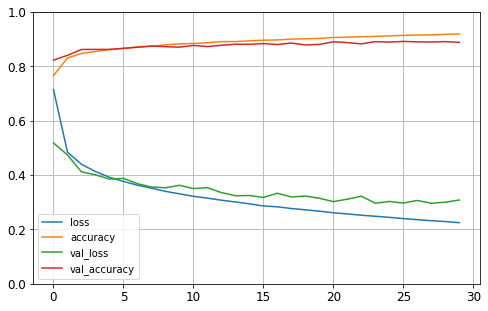

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) #Sets the veritcal range to [0,-1] 
plt.show()

In [26]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 748us/step - loss: 0.3434 - accuracy: 0.8775


[0.34338998794555664, 0.8774999976158142]

In [29]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.01, 0.  , 0.97],
       [0.  , 0.  , 0.97, 0.  , 0.02, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_pred=np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [34]:
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## Building a Regression MLP 

In [37]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3] #pretend that these are new instances
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 910us/step - loss: 1.0820 - val_loss: 0.6126
Epoch 2/20
363/363 [==============================] - 0s 703us/step - loss: 0.5275 - val_loss: 0.5260
Epoch 3/20
363/363 [==============================] - 0s 634us/step - loss: 0.4700 - val_loss: 0.4777
Epoch 4/20
363/363 [==============================] - 0s 631us/step - loss: 0.4480 - val_loss: 0.4574
Epoch 5/20
363/363 [==============================] - 0s 673us/step - loss: 0.4329 - val_loss: 0.4487
Epoch 6/20
363/363 [==============================] - 0s 666us/step - loss: 0.4233 - val_loss: 0.4444
Epoch 7/20
363/363 [==============================] - 0s 674us/step - loss: 0.4158 - val_loss: 0.4355
Epoch 8/20
363/363 [==============================] - 0s 714us/step - loss: 0.4084 - val_loss: 0.4309
Epoch 9/20
363/363 [==============================] - 0s 854us/step - loss: 0.4044 - val_loss: 0.4229
Epoch 10/20
363/363 [==============================] - 0s 778us/step - loss: 0.399

In [40]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30,activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [41]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [45]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:,2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:,2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:,2:]
X_new_A, X_new_B = X_new[:, :5], X_new[:,2:]

In [46]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 975us/step - loss: 2.6571 - val_loss: 1.1173
Epoch 2/20
363/363 [==============================] - 0s 781us/step - loss: 0.9497 - val_loss: 0.8092
Epoch 3/20
363/363 [==============================] - 0s 744us/step - loss: 0.7543 - val_loss: 0.7085
Epoch 4/20
363/363 [==============================] - 0s 668us/step - loss: 0.6784 - val_loss: 0.6647
Epoch 5/20
363/363 [==============================] - 0s 677us/step - loss: 0.6341 - val_loss: 0.6236
Epoch 6/20
363/363 [==============================] - 0s 686us/step - loss: 0.6022 - val_loss: 0.5983
Epoch 7/20
363/363 [==============================] - 0s 734us/step - loss: 0.5781 - val_loss: 0.5782
Epoch 8/20
363/363 [==============================] - 0s 741us/step - loss: 0.5599 - val_loss: 0.5645
Epoch 9/20
363/363 [==============================] - 0s 803us/step - loss: 0.5461 - val_loss: 0.5538
Epoch 10/20
363/363 [==============================] - 0s 903us/step - loss: 0.534